# National Public Opinion Reference Survey (NPORS) Analysis

Author: Jennifer Le  
Date: 12/6/24

The purpose of this analysis is to   
1. Examine how public opinions on topics like the economy has changed from 2020 to 2024.  
2. Discovering interesting trends and correlations between different income and age groups. 

This will be done using data from NPORS surveys conducted anually since 2020.

[More information on NPORS surveys](https://www.pewresearch.org/methods/fact-sheet/national-public-opinion-reference-survey-npors/) 

[notebook viewer](https://nbviewer.org/github/JenniferMLe/Data-Analytics-Portfolio/blob/main/NPORS%20Dataset%20Analysis/main.ipynb)

## Import Datasets 

In [600]:
import pandas as pd
import plotly.express as px
from pandasql import sqldf

# Save each .sav as a data frame
df_20 = pd.read_spss("Datasets/NPORS-2020/dataset.sav")
df_21 = pd.read_spss("Datasets/NPORS-2021/dataset.sav")
df_22 = pd.read_spss("Datasets/NPORS-2022/dataset.sav")
df_23 = pd.read_spss("Datasets/NPORS-2023/dataset.sav")
df_24 = pd.read_spss("Datasets/NPORS-2024/dataset.sav")

# convert .sav to .csv
# df_20.to_csv("Datasets/NPORS-2020/dataset.csv", index=False)
# df_21.to_csv("Datasets/NPORS-2021/dataset.csv", index=False)
# df_22.to_csv("Datasets/NPORS-2022/dataset.csv", index=False)
# df_23.to_csv("Datasets/NPORS-2023/dataset.csv", index=False)
# df_24.to_csv("Datasets/NPORS-2024/dataset.csv", index=False)

# Print the number of rows and columns 
print("(number of rows, number of columns)")
print("2020 survey: ", df_20.shape)
print("2021 survey: ", df_21.shape)
print("2022 survey: ", df_22.shape)
print("2023 survey: ", df_23.shape)
print("2024 survey: ", df_24.shape)

def remove_year_from_column_name(dataset, stop):
    list_columns = list(dataset.columns)

    for i in range(0,len(list_columns)-stop):
        list_columns[i] = list_columns[i][:-5]

    dataset.columns = list_columns

remove_year_from_column_name(df_20, 5)
remove_year_from_column_name(df_21, 2)

# Test code works
# print(list(df_20.columns))
# print(list(df_21.columns))

(number of rows, number of columns)
2020 survey:  (4108, 61)
2021 survey:  (3937, 66)
2022 survey:  (4043, 72)
2023 survey:  (5733, 80)
2024 survey:  (5626, 59)


## Clean, Transform, and Aggregate Data

In [601]:
# ensure columns recording the same data have the same name
# so there aren't duplicate columns when appending datasets
df_20 = df_20.rename(columns={
    'SEXASK':'GENDER', 
    'NUMADULTS':'HH_ADULTS', 
    'EDUC_ACS':'EDUCATION', 
    'REGION_NAME':'REGION',
    'MSA':'METRO'
})

df_21 = df_21.rename(columns={
    'ADULTSINHH':'HH_ADULTS', 
    'BOOKS1':'BOOKS',
    'LANG':'LANGUAGE'
})

df_22 = df_22.rename(columns={
    'ADULTSINHH':'HH_ADULTS', 
    'BOOKS1':'BOOKS', 
    'CREGION':'REGION',
    'BBHOME':'HOMEINTSERV'
})

df_23 = df_23.rename(columns={
    'BASEWT':'BASEWEIGHT', 
    'ADULTS':'HH_ADULTS', 
    'BOOKS1':'BOOKS',
    'CREGION':'REGION',
    'INC_SDT1':'INCOME',
    'BBHOME':'HOMEINTSERV',
    'MODE_2WAY':'MODE'
})

df_24 = df_24.rename(columns={
    'BASEWT':'BASEWEIGHT', 
    'ADULTS':'HH_ADULTS', 
    'DEVICE1A':'DEVICE1a',
    'CREGION':'REGION',
    'INC_SDT1': 'INCOME'
})

# add year columns to all datasets
df_20['YEAR'] = 2020
df_21['YEAR'] = 2021
df_22['YEAR'] = 2022
df_23['YEAR'] = 2023
df_24['YEAR'] = 2024

# Combine (append) all datasets together
df_combined = pd.concat([df_20, df_21, df_22, df_23, df_24])
print(df_combined.shape)

# remove irrelevant columns
df_combined = df_combined.drop(columns=[
    'AGE_REFUSED',
    'BOOKS1_REFUSED',
    'BORN',
    'BWAVE',
    'BIDENT1_GEOSTRATA',
    'BIRTHPLACE',
    'DATERECEIVED',
    'DEVICE_TYPE',
    'LANG_PREF',
    'LANGUAGE',
    'LANGUAGEINITIAL',
    'NATIVITY',
    'PARTYSUM',
    'PSTRATA',
    'RACEMOD_99',
    'RACEMOD_MIXEDOE',
    'RACETHN',
    'RACETHNMOD',
    'SURVEYENDDATE',
    'SURVEYSTARTDATE',
    'STRATUM'
], axis=1)

# replace income values with easier-to-read values
df_combined['INCOME'] = df_combined['INCOME'].replace({
    'Less than $10,000':'< $10K',
    '$10,000 to less than $20,000':'$10-20K',
    '$20,000 to less than $30,000':'$20-30K',
    'Less than $30,000':'< $30K',
    '$30,000 to less than $40,000':'$30-40K',
    '$40,000 to less than $50,000':'$40-50K',
    '$50,000 to less than $60,000':'$50-60K',
    '$50,000 to less than $75,000': '$50-75K',
    '$60,000 to less than $70,000':'$60-70K',
    '$70,000 to less than $80,000':'$70-80K',
    '$70,000 to less than $90,000':'$70-90K',
    '$75,000 to less than $100,000':'$75-100K',
    '$80,000 to less than $90,000':'$80-90K',
    '$90,000 to less than $100,000':'$90-100K',
    '$100,000 or more':'> $100K',
    '$100,000 to less than $150,000':'$100-150K',
    '$150,000 or more':'> $150K'
})
# replace education values with easier-to-read values
df_combined['EDUCATION'] = df_combined['EDUCATION'].replace({
    "Associate degree (such as AA, AS)":"Associate's Degree",
    "Associate's degree (such as AA, AS)":"Associate's Degree",
    "Associate’s degree (such as AA, AS)":"Associate's Degree",
    "Associate’s degree":"Associate's Degree",
    "Associate’s degree (for example: AA, AS)":"Associate's Degree",
    "Bachelor's degree (such as BA, BS)":"Bachelor's Degree",
    "Bachelor’s degree":"Bachelor's Degree",
    "Bachelor’s degree (for example: BA, BS)":"Bachelor's Degree",
    "Bachelor’s degree (such as BA, BS)":"Bachelor's Degree",
    "Doctorate degree (for example: PhD, EdD)":"Doctorate Degree",
    "Master’s degree (for example: MA, MS, MEng, MEd, MSW, MBA)":"Master's Degree",
    "Master’s degree or higher":"Master's degree or higher",
    "Grade 1 through 11":"Grade 11",
    "Kindergarten through grade 11":"Grade 11",
    "GED or alternative credential":"High School or GED",
    "Regular high school diploma":"High School or GED",
    "Regular high school diploma or GED":"High School or GED",
    "Kindergarten through grade 12":"Grade 12",
    "Professional degree beyond a bachelor’s degree (for example: MD, DDS, DVM, LLB, JD)":"Bachelor's Degree or Higher",
    "Some college credit but no degree":"Some college",
    "Some college credit, but less than 1 year of college credit":"Some college",
    "1 or more years of college credit, no degree":"Some college",
    "12th Grade – NO DIPLOMA": "Grade 12"
})

# change affirmative answer selections to race description
df_combined['RACEMOD_1'] = df_combined['RACEMOD_1'].replace({
    'Yes':'White',
    'Selected':'White'
})
df_combined['RACEMOD_2'] = df_combined['RACEMOD_2'].replace({
    'Black or African American':'Black',
    'Yes':'Black',
    'Selected':'Black'
})
df_combined['RACEMOD_3'] = df_combined['RACEMOD_3'].replace({
    'Asian or Asian-American':'Asian',
    'Asian or Asian American':'Asian',
    'Yes':'Asian', 
    'Selected':'Asian'
})
df_combined['RACEMOD_4'] = df_combined['RACEMOD_4'].replace({
    'Yes':'American Indian or Alaska Native',
    'Selected':'American Indian or Alaska Native'
})
df_combined['RACEMOD_5'] = df_combined['RACEMOD_5'].replace({
    'Yes':'Native Hawaiian or other Pacific Islander',
    'Selected':'Native Hawaiian or other Pacific Islander'
})
df_combined['RACEMOD_6'] = df_combined['RACEMOD_6'].replace({
    'Some other race or origin':'Other', 
    'Yes':'Other', 
    'Selected':'Other'
})

df_combined['GENDER'] = df_combined['GENDER'].replace({
    "A man":"Male",
    "A woman":"Female",
    "In some other way":"Other"
})
df_combined["AGE"] = df_combined["AGE"].replace({
    "Refused":"-1",
    "98+":"98",
    "":"-1"
})
df_combined['ECON1MOD'] = df_combined['ECON1MOD'].replace('Only Fair','Only fair')

df_combined['BOOKS'] = df_combined['BOOKS'].replace({
    '100 or more':'100.1',
    '100+':'100.1',
    '95 or more':'95.1',
    "":'-1',
    "Refused":"-1"
})

# change column type
df_combined["AGE"] = df_combined["AGE"].astype(float)
df_combined["BOOKS"] = df_combined["BOOKS"].astype(float)

# rename Social Media Use columns, SMUSE a-i
df_combined = df_combined.rename(columns={
    'SMUSE_a':'FACEBOOK',
    'SMUSE_b':'YOUTUBE',
    'SMUSE_c':'TWITTER',
    'SMUSE_d':'INSTAGRAM',
    'SMUSE_e':'SNAPCHAT',
    'SMUSE_f':'WHATSAPP',
    'SMUSE_g':'LINKEDIN',
    'SMUSE_h':'PINTEREST',
    'SMUSE_i':'TIKTOK',
    'SMUSE_j':'BEREAL',
    'SMUSE_k':'REDDIT'
})

# create calculated columns categorizing income and age
df_combined = sqldf(
    """
    SELECT *,
    CASE
        WHEN INCOME IN ('< $10K','$10-20K','$20-30K','< $30K','$30-40K')     THEN 'Under $40k'
        WHEN INCOME IN ('$40-50K','$50-60K','$60-70K')                       THEN '$40-70K'
        WHEN INCOME IN ('$70-80K','$70-90K','$80-90K','$75-100K','$90-100K') THEN '$70-100K'
        WHEN INCOME IN ('> $100K','$100-150K','> $150K')                     THEN '$100K+'
        ELSE 'Other'
    END as INCOME_GROUP,
    CASE
        WHEN AGE < 30               THEN 'Under 30'
        WHEN AGE >= 30 AND AGE < 50 THEN '30-50'
        WHEN AGE >=50 AND AGE < 70  THEN '50-70'
        WHEN AGE >= 70              THEN '70+'
        ELSE 'Other'
    END as AGE_GROUP
    FROM df_combined
    """
)

df_combined.to_csv('CSV Files/combined_dataset.csv',index=False)
print(df_combined.shape)

# print columns common to datasets
print('all columns', sorted(list(df_combined.columns)))
common_columns = set(df_20) & set(df_21) & set(df_22) & set(df_23) 
print('common columns', len(common_columns), sorted(common_columns))


(23447, 106)
(23447, 87)
all columns ['AGE', 'AGECAT', 'AGE_GROUP', 'ATTEND', 'ATTENDONLINE2', 'BASEWEIGHT', 'BEREAL', 'BOOKS', 'COLSPEECH', 'COMATTACH', 'COMTYPE2', 'COVIDWORK_a', 'COVIDWORK_b', 'CRIMESAFE', 'DEVICE1a', 'DISA', 'DISAMOD', 'DIVISION', 'ECON1BMOD', 'ECON1MOD', 'EDUCATION', 'EDUCCAT', 'EMINUSE', 'FACEBOOK', 'GAMBLERESTR', 'GENDER', 'GOVSIZE1', 'GUNSTRICT', 'HH_ADULTS', 'HISP', 'HLTHRATE', 'HOME4NW2', 'HOMEINTSERV', 'INCOME', 'INCOME_GROUP', 'INFRASPEND', 'INSTAGRAM', 'INSURANCE', 'INTERVIEW_END', 'INTERVIEW_START', 'INTFREQ', 'INTFREQ_COLLAPSED', 'INTMOB', 'LINKEDIN', 'MARITAL', 'METRO', 'MODE', 'MOREGUNIMPACT', 'NHISLL', 'PARTY', 'PARTYLN', 'PINTEREST', 'POLICE_FUND', 'PRAY', 'RACECMB', 'RACEMOD_1', 'RACEMOD_2', 'RACEMOD_3', 'RACEMOD_4', 'RACEMOD_5', 'RACEMOD_6', 'RADIO', 'REDDIT', 'REG', 'REGION', 'REGISTRATION', 'RELIG', 'RELIGCAT1', 'RELIMP', 'RESPFUT', 'RESPID', 'ROBWRK', 'SMART2', 'SNAPCHAT', 'SOCTRUST', 'TIKTOK', 'TWITTER', 'TYPOLOGYb', 'UNITY', 'VET1', 'VOL12_CPS

## Suvery Participant Demographics

In this section, we will get to know our 2020-2024 survey participants and who they consist of by examining their age, race, gender, income, and education.

In [602]:
# print a list of distinct values from a column in a dataframe
def get_distinct_values(df,column):
    df_values = sqldf(
        f"""
        SELECT DISTINCT {column}
        FROM {df}
        ORDER BY {column} ASC
        """
    )
    # print(df_values)

    # print to csv file incase values are cut off from the print statement
    df_values.to_csv("CSV Files/distinct_values.csv",index=False)

def create_distinct_value_count_df(df, col, invalid_values):
    return sqldf(
        f"""
        SELECT {col}, COUNT(*) as Count
        FROM {df}
        WHERE {col} NOT IN {invalid_values}
        GROUP BY {col}
        """
    )

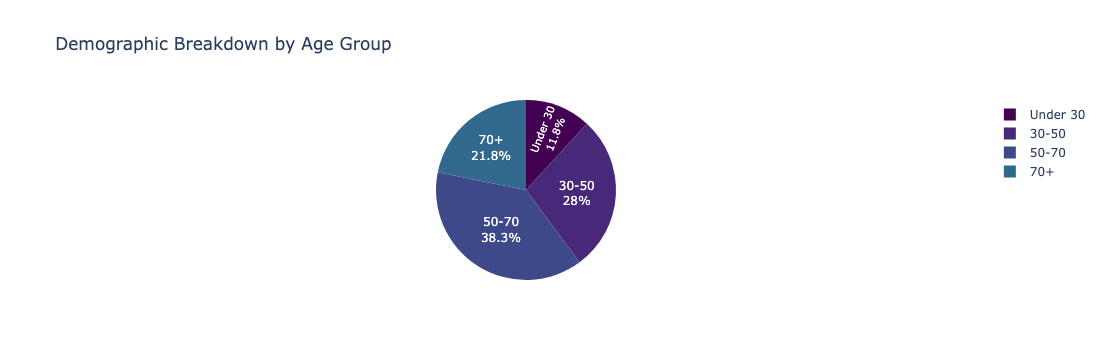

In [603]:
# look in distinct_values.csv to see results
get_distinct_values('df_combined','AGE')

fig = px.histogram(
    df_combined[df_combined["AGE"] != -1], 
    x = "AGE", 
    title = "Demographic Breakdown by Age",
    color_discrete_sequence=px.colors.sequential.Viridis
)
fig.update_xaxes(title="Age").show()

fig = px.pie(
    create_distinct_value_count_df('df_combined','AGE_GROUP',"('Other')"),
    values='Count',
    names='AGE_GROUP',
    title='Demographic Breakdown by Age Group',
    category_orders={
        'AGE_GROUP':[
            'Under 30',
            '30-50',
            '50-70',
            '70+'
        ],
    },
    color_discrete_sequence=px.colors.sequential.Viridis
)
fig.update_traces(textposition='inside', textinfo='percent+label').show()

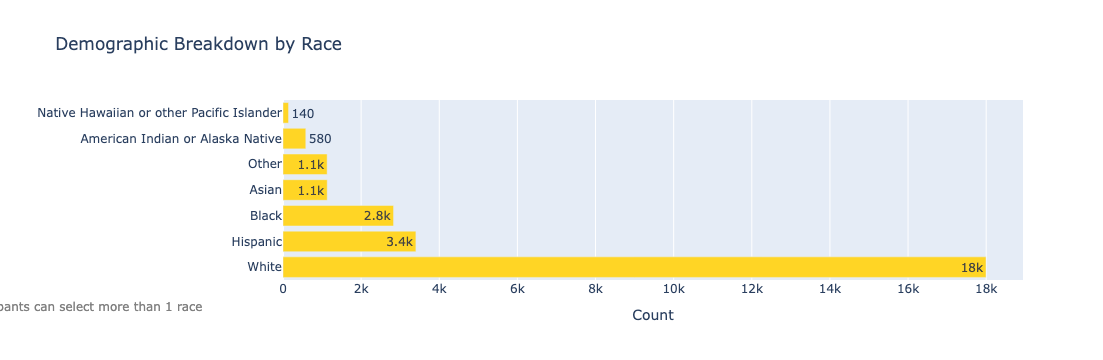

In [604]:
# get count of each race
df_race_count = sqldf(
    """
    SELECT 
        Count(CASE WHEN RACEMOD_1 = 'White' THEN 1 END) as White,
        Count(CASE WHEN RACEMOD_2 = 'Black' THEN 1 END) as Black,
        Count(CASE WHEN RACEMOD_3 = 'Asian' THEN 1 END) as Asian,
        Count(CASE WHEN RACEMOD_4 = 'American Indian or Alaska Native' THEN 1 END) as 'American Indian or Alaska Native',
        Count(CASE WHEN RACEMOD_5 = 'Native Hawaiian or other Pacific Islander' THEN 1 END) as 'Native Hawaiian or other Pacific Islander',
        Count(CASE WHEN HISP = 'Yes' THEN 1 END) as Hispanic,
        Count(CASE WHEN RACEMOD_6 = 'Other' THEN 1 END) as 'Other'
    FROM df_combined
    """
)
df_race_count.to_csv("CSV Files/result.csv",index=False)

# convert columns to rows 
df_race_count_long = pd.melt(
    df_race_count,
    var_name='Race',
    value_name='Count'
)
df_race_count_long.to_csv("CSV Files/result2.csv",index=False)

fig = px.bar(
    df_race_count_long, 
    y='Race', 
    x='Count',
    title='Demographic Breakdown by Race',
    text_auto='.2s', # put numbers in K format
    color_discrete_sequence=['#ffd525']
    
)

# add subtitle
fig.update_layout(
    annotations=[
        dict(
            x=-0.45, y=-0.20,  # Position below the chart
            text="*Participants can select more than 1 race",
            showarrow=False,  # No arrow pointing to the text
            xref="paper", yref="paper",  # Position relative to the chart
            font=dict(size=12, color="gray"),
        )
    ]
)
fig.update_yaxes(title="").update_layout(yaxis={'categoryorder':'total descending'}).show()

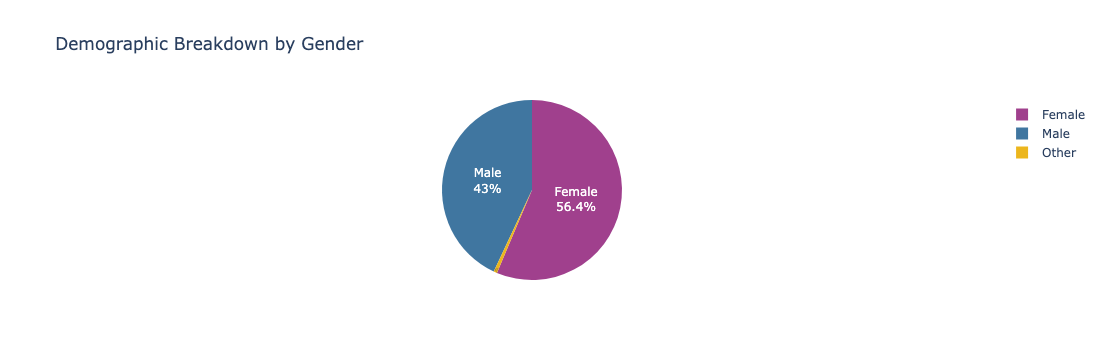

In [605]:
# look in distinct_values.csv to see results 
get_distinct_values('df_combined','GENDER')

fig = px.pie(
    create_distinct_value_count_df('df_combined','GENDER','("Don\'t know/Refused/Web blank", "Refused")'),
    names='GENDER',
    values='Count',
    title='Demographic Breakdown by Gender',
    color_discrete_sequence=['#a0408d','#4076a0','#ecb61d']
)
fig.update_traces(textposition='inside', textinfo='percent+label').show()

In [606]:
# look in distinct_values.csv to see results
get_distinct_values('df_combined','INCOME')

fig = px.bar(
    create_distinct_value_count_df('df_combined','INCOME','("Refused","Don\'t know/Refused/Web blank")'), 
    y='INCOME', 
    x='Count', 
    text='Count',
    title="Demographic Breakdown by Income Group",
    color_discrete_sequence=['#b088f9'],
    category_orders={'INCOME':[
        '< $10K',
        '$10-20K',
        '$20-30K',
        '< $30K',
        '$30-40K',
        '$40-50K',
        '$50-60K',
        '$50-75K',
        '$60-70K',
        '$70-80K',
        '$70-90K',
        '$80-90K',
        '$75-100K',
        '$90-100K',
        '> $100K',
        '$100-150K',
        '> $150K'
    ]}
)
fig.update_yaxes(title="Income").show()

fig = px.bar(
    create_distinct_value_count_df('df_combined','INCOME_GROUP',"('Other')"),
    x='INCOME_GROUP',
    y='Count',
    title='Demographic Breakdown by Income Group (Summarized)',
    text_auto='.2s',
    color_discrete_sequence=['#77be34'],
    category_orders={'INCOME_GROUP':[
        'Under $40k',
        '$40-70K',
        '$70-100K',
        '$100K+'
    ]}
)

# add subtitle
fig.update_layout(
    annotations=[
        dict(
            x=-0.08, y=-0.20,  # Position below the chart
            text="*Participants in the $50-75K group (665 people) are excluded",
            showarrow=False,  # No arrow pointing to the text
            xref="paper", yref="paper",  # Position relative to the chart
            font=dict(size=12, color="gray"),
        )
    ]
).update_xaxes(title="Income Group").show()


In [607]:
# look in distinct_values.csv to see results
get_distinct_values('df_combined','EDUCATION')

fig = px.bar(
    create_distinct_value_count_df('df_combined','EDUCATION','("Refused","Don\'t know/Refused/Web blank")'),
    y = 'EDUCATION',
    x = 'Count',
    title = 'Demographic Breakdown by Education',
    color_discrete_sequence=['#063dcf'], 
    text='Count',
    category_orders={'EDUCATION':[
        'No schooling completed',
        'Kindergarten',
        'Grade 11',
        'Grade 12',
        'High School or GED',
        "Some college",
        "Associate's Degree",
        "Bachelor's Degree",
        "Bachelor's Degree or Higher",
        "Master's Degree",
        "Master's degree or higher",
        "Doctorate Degree"
    ]}
)
fig.update_yaxes(title="Education").show()


## Exploring Changes from 2020 to 2024

In [608]:
# this function displays a cluster bar graph dispalying yearly changes in a column in the combined dataframe
def examine_changes(df, df_count, column, new_column_name, title, method, category_order, color_map):
    # examine distinct values of ECON1MOD, look in distinct_values.csv to see results
    get_distinct_values('df_combined', column)

    # get count of each economy 
    df_change = sqldf(
        f"""
        SELECT 
            YEAR as Year, 
            {column} as `{new_column_name}`, 
            COUNT(*) as Count
        FROM {df}
        Where `{new_column_name}` NOT IN ("Refused", "Don't know/Refused/Web blank", "Other","Something else")
        GROUP BY Year, `{new_column_name}`
        """
    )
    if method == 1:
        df_change['Percent'] = (df_change['Count'] / df_change.groupby('Year')['Count'].transform('sum')) * 100
    if method == 2:
        df_change['Percent'] = (df_change['Count'] / df_count['Count']) * 100

    df_change.to_csv("CSV Files/result.csv",index=False)

    fig = px.histogram(
        df_change,
        x='Year',
        y='Percent',
        color=new_column_name,
        barmode='group',
        title=title,
        hover_data=['Count'],
        category_orders={new_column_name:category_order},
        color_discrete_map=color_map
    )
    fig.update_yaxes(title="Percentage").show()

### Opinions about the Economy from 2020-2024

In [609]:
color_map = {
    'Excellent':"#0daa00",
    'Good':'#8fdc32',
    'Only fair':'#ffc500',
    'Poor':'#f6492a'
}
examine_changes('df_combined',None,'ECON1MOD','Economic Conditions',
                'Yearly Breakdown by how Particapates Rate their Community\'s Economic Conditions',1,[],color_map)

order = ['Better','About the same','Worse']
color_map = {
    'Better':"#8fdc32",
    'About the same':'#ffc500',
    'Worse':'#f6492a'
}
examine_changes('df_combined',None,'ECON1BMOD', 'Economic Conditions in 1 Year', 
                'Yearly Breakdown by Opinions about the Economic Conditions of their Community in 1 Year',1, order,color_map)


Opinions on the current economic conditions and estimated economic conditions in a year became more negative from 2021 to 2022. 

The percent of survey participants who believed the economy was going to get worse in a year increased from 21% to 37% from 2021 to 2022. The percent of survey participants who believed their community's economy was poor increased from 10% to 21%.

This could be caused by record-breaking inflation rates that occured towards the end of 2021 and throughout 2022. 

Source: [United States Inflation Rate](https://tradingeconomics.com/united-states/inflation-cpi)   

Next let's explore which groups are causing this increase in negative sentiment about the economy. 

In [610]:
# select all participants from 2021 and 2022 who believe their community's economic conditions is poor
df_econ_poor = sqldf(
    """
    SELECT *
    FROM df_combined
    WHERE ECON1MOD = 'Poor' AND
    YEAR IN (2021,2022)
    """
)
df_econ_poor.to_csv("CSV Files/result.csv",index=False)

# select all participants from 2021 and 2022 who believe their community's economic conditions will get worse
df_econ_worse = sqldf(
    """
    SELECT *
    FROM df_combined
    WHERE ECON1BMOD = 'Worse' AND
    YEAR IN (2021,2022)
    """
)
df_econ_worse.to_csv("CSV Files/result2.csv",index=False)

In [611]:
income_map1 = {
    'Under $40k':"#002471",
    '$40-70K':"#0041cb",
    '$70-100K':"#407dff",
    '$100K+':"#aec8ff"
}

examine_changes('df_econ_poor',None,'INCOME_GROUP','Income Group', 
                'Percent Contribution When Belief is their Community\'s Economy is Poor', 1,
                ['Under $40k','$40-70K','$70-100K','$100K+'],income_map1)

From this graph, we can see that the percent contribution of each income group to the total number of participants who thought their community's economy is poor is more balenced across the the income groups in 2022 than in 2021. This tells us that high inflation rates (and possibly other factors) affected higher income groups as well as low income groups. 

Interestingly, there are more people who believed their community's economy is poor in the group making more than 100,000 than the \$70-100K group.

In [612]:
df_income_group_count = sqldf(
        """
        SELECT YEAR, INCOME_GROUP, COUNT(*) as Count
        FROM df_combined
        WHERE YEAR IN (2021,2022) AND INCOME_GROUP <> 'Other'
        GROUP BY YEAR, INCOME_GROUP
        """
)

print(df_income_group_count)

examine_changes('df_econ_poor',df_income_group_count,'INCOME_GROUP','Income Group', 
                'Percent of Income Groups who Believe Their Community\'s Economy is Poor', 2,
                ['Under $40k','$40-70K','$70-100K','$100K+'],income_map1)

   YEAR INCOME_GROUP  Count
0  2021       $100K+   1075
1  2021      $40-70K    830
2  2021     $70-100K    635
3  2021   Under $40k   1203
4  2022       $100K+   1190
5  2022      $40-70K    830
6  2022     $70-100K    653
7  2022   Under $40k   1133


The percent of each income group who thought their community's economic conditions is poor increased for all income groups showing us that high inflation is an issue for everyone regardless of income. 

In [613]:
income_map2 = {
    'Under $40k':"#3d005e",
    '$40-70K':"#8a03d5",
    '$70-100K':"#bd45ff",
    '$100K+':"#d995ff"
}

examine_changes('df_econ_worse',None,'INCOME_GROUP','Income Group', 
                'Percent Contribution When Belief is the Economy will get Worse', 1,
                ['Under $40k','$40-70K','$70-100K','$100K+'],income_map2)

For the year 2022, participants who make $100K or more are the biggest contributor to the total number of participants who thought the economy was going to get worse and the second biggest for the year 2021. 

Theses percentages decrease as income increses (which is excepted) except for the highest income group. 

In [615]:
examine_changes('df_econ_worse', df_income_group_count, 'INCOME_GROUP','Income Group', 
                'Percent of Income Groups Who Believed Their Community\'s Economy Will Get Worse', 2,
                ['Under $40k','$40-70K','$70-100K','$100K+'],income_map2)

The percent of income groups who believe the economy will get worse increases for all group from 2021 to 2022. 

The group making 100,000 or more has the greatest increase. 20.1% of $100K\+ individuals thought the economy was going to get worse in 2021 which jumped to 37.6% in 2022.

In [616]:
df_party_count = sqldf(
    """
    SELECT YEAR, PARTY, COUNT(*) as Count
    FROM df_combined
    WHERE YEAR IN (2021,2022) AND PARTY not in ('Something else', 'Refused')
    GROUP BY YEAR, PARTY
    """
)
print(df_party_count)

party_map = {
    'Democrat':"#5eaaff",
    'Republican':"#ff5e5e",
    'Independent':"#84d660"
}

examine_changes('df_econ_poor',None,'PARTY','Political Party', 
                'Percent Contribution When Belief is their Community\'s Economy is Poor',1,[],party_map)

examine_changes('df_econ_poor',df_party_count,'PARTY','Political Party', 
                'Percent of Political Party Groups Who Believed their Community\'s Economy is Poor',2,[],party_map)

   YEAR        PARTY  Count
0  2021     Democrat   1379
1  2021  Independent    945
2  2021   Republican   1146
3  2022     Democrat   1342
4  2022  Independent    950
5  2022   Republican   1260


In 2022, half of all participants who believed their community's economy is poor are Repubicans which increased from 32.8% in 2021. The percent of Republicans who believed their economy was poor increased from 9% to 29%. This could be because they are most likely to be unhappy with rising inflation rates under democrat Joe Biden leadership. 

## Exploring Trends and Correlations

In [635]:
def correlation(df, col_x, col_y, ord_x, ord_y, x_axis_title, title, color_map):
    # get count of each economy 
    df_change = sqldf(
        f"""
        SELECT 
            {col_x}, 
            {col_y}, 
            COUNT(*) as Count
        FROM {df}
        WHERE {col_y} NOT IN ("Refused", "",-1) AND {col_x} <> 'Other'
        GROUP BY {col_x}, {col_y}
        """
    )
    # df_change = df_change.replace('Only Fair','Only fair')
    df_change['Percent'] = (df_change['Count'] / df_change.groupby(col_x)['Count'].transform('sum')) * 100
    df_change.to_csv("CSV Files/result.csv",index=False)

    fig = px.histogram(
        df_change,
        x=col_x,
        y='Percent',
        color=col_y,
        barmode='group',
        title=title,
        hover_data=['Count'],
        category_orders={
            col_x:ord_x,
            col_y:ord_y
        },
        color_discrete_map=color_map
    )
    fig.update_layout(legend_title_text='')
    fig.update_yaxes(title="Percentage").update_xaxes(title=x_axis_title).show()

### Income vs Religiousness

In [638]:
income_order = ['Under $40k','$40-70K','$70-100K','$100K+']
age_order = ['Under 30','30-50','50-70','70+']

relimp_map = {
    'Not at all important':'#ffa2e3',
    'Not too important':'#ff59ce',
    'Somewhat important':'#cf0092',
    'Very important':'#4e0037'
}

correlation('df_combined','INCOME_GROUP','RELIMP', income_order, [], 'Income Group',
            'Importance of Religion in Participants\' Lives by Income Group', relimp_map)

correlation('df_combined','AGE_GROUP','RELIMP', age_order, [], 'Age Group',
            'Importance of Religion in Participants\' Lives by Age Group', relimp_map)

pray_order = [
    'Never',
    'Seldom', 
    'A few times a month', 
    'A few times a week', 
    'Once a week', 
    'Once a day', 
    'Several times a day'
]

pray_map = {
    'Never':'#000817',
    'Seldom':'#002679', 
    'A few times a month':'#003bbd', 
    'A few times a week':'#004efb', 
    'Once a week':'#2d6fff', 
    'Once a day':'#6193ff', 
    'Several times a day':'#a8c4ff'
}

correlation('df_combined','INCOME_GROUP','PRAY', income_order, pray_order, 'Income Group',
    'How Often Someone Prays by Income Group', pray_map)

correlation('df_combined','AGE_GROUP','PRAY', age_order, pray_order, 'Age Group',
    'How Often Someone Prays by Age Group', pray_map)

Lower income and older individuals are more religious as measured by how often they pray and how important religion is in their lives. 

The percent of those who pray serveral times a day decrease with income and increase with age. More than half of those who make less than $40,000$ believe religion is very important in their lives. This percent drops to 37% for those that make over $100,000$.

### Income vs Social Media

In [639]:
use_map = {
    'No, don’t use this':'#78379d',
    'Yes, use this':'#d67d37'
}

correlation('df_combined','INCOME_GROUP','REDDIT', income_order, [], 'Income Group','Reddit Use by Income Group', use_map)
correlation('df_combined','INCOME_GROUP','LINKEDIN', income_order, [], 'Income Group','Linkedin Use by Income Group', use_map)

Higher earning individuals are also more likely to use linkedin and reddit